<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Jinchen Liu 1009407
* Student 2 Full Name and Number : 
* Workshop day :  Wednesday
* Workshop time :  1p.m.

# <font color='blue'> Workshop 2 – Machine Learning (ML) [3 weeks] </font>

## Objectives:

* Gain hands-on experience with basic machine learning paradigms.
* Familiarise yourself with some of the practical software tools used for machine learning.
* Solve basic machine learning problems using Python Scipy and Scikit-learn.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
Optimisation is widely used in engineering (practice and research) today. That was not always so. I expect that in the future machine learning will be as prevalently used in engineering as optimisation is used today. The arguments in favour of it are (a) increasingly more powerful computing (b) lots of data (c) decreasing storage and computing costs. Machine learning benefits substantially from these trends. We will hopefully see together how engineering world will evolve in this century.

In this workshop, you will learn how to solve machine learning problems in practice and apply common algorithms to various data sets. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with simple, easy-to-visualise (2D) data sets so that concepts become clear. More interesting problems and data will be posed as open-ended (and optional) problems.

You will also familiarise yourself with machine learning libraries of Python, which is the de-facto language for ML these days. Still, the tools and data are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better ML frameworks and more complex data sets but it is not realistic to cover all. Due to time limitations, we unfortunately do not focus on a big topic in this workshop and subject: [data science](https://study.unimelb.edu.au/find/courses/graduate/master-of-data-science/what-will-i-study/). You should not get the wrong impression from the nice, cleaned-up data sets you are given in this workshop. In real life, data is messy (as everything else!) and more than half of data science is about preparing data itself. 

> In the future, you should consider learning additional ML software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. I would also recommend learning more about data preparation and analysis. The popular [Pandas](https://pandas.pydata.org/) library, which we briefly use, makes a good starting point.

## Workshop Preparation: 

You can start your workshop early to learn much more! We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and being prepared for the workshop is one of the best ways to gain more knowledge! For example, you can easily answer some of the initial questions in each workshop by yourself.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from Canvas
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use the [_Regressors_](https://regressors.readthedocs.io/en/latest/) package for convenience for couple of minor things. You can [install the package](https://regressors.readthedocs.io/en/latest/installation.html) simply by using

```pip install regressors``` 

from within the Anaconda environment. Ask for help from your demonstrator in case you need it.



## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

**This workshop has 50 points.** *There is no bonus question in this workshop. If you finish it early, the next one will be available for you start to working on.*

# Section 1: Linear Regression, Overfitting, and Regularisation

## 1.1 _Example_. Using curve fitting to model Diode characteristics.

![Diode characteristic](img/diode.png)

The diagram above shows the I-V curve of a [diode](https://en.wikipedia.org/wiki/Diode) widely used in electronic circuits, see [1N4001-D spec sheet (right click to download)](1N4001-D.pdf).

We can use regression to model the I-V curve of this diode at 25 degrees C. 

Using the nice tool, [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/), a small and clean data set is generated and stored in [csv format](https://en.wikipedia.org/wiki/Comma-separated_values). We now use the famous [pandas library](https://pandas.pydata.org/) to read the *csv* file.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib

dataset=pd.read_csv('files/diode_dataset.csv', names=['Vf', 'If'])
# Note that if you don't put names to csv or into the function as above, 
# pandas ignores the first row in calculations!
dataset.head()

Vf        If
0  0.794737  0.100714
1  0.801316  0.111255
2  0.806579  0.127593
3  0.811842  0.140954
4  0.815789  0.153793

<IPython.core.display.Javascript object>


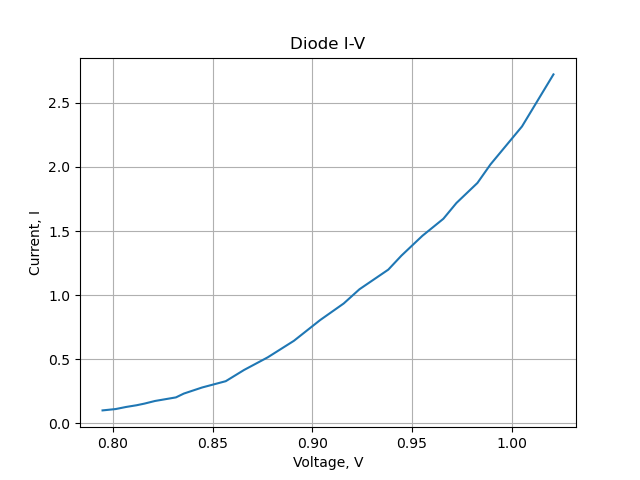

In [19]:
plt.figure()
plt.plot(dataset.values[:,0], dataset.values[:,1])
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.grid()
plt.show()

_Note that the figure above is convex but the one above was looking concave! Can you see why?_

### Question 1.1 (10 pts)

Let us consider the linear model $I=f(V)=a+bV$, for $a, b \in \mathbb{R}$ for simplicity.

We can find the best $(a, b)$ that minimise the error between the $N$ data points $(I_j, V_j)$ and this linear model by solving the optimisation problem 

$$\min_{a, b} \sum_{j=1}^N (I_j- (a + b V_j))^2 $$

This is equivalent *in spirit* to what the machine learning libraries such as *sklearn (scikit-learn)* do to solve this problem! As you will repeatedly see, there is a deep and close relationship between optimisation and many learning methods.

1. Find the $a, b$ by solving the unconstrained optimisation problem above using e.g. *pyomo*. Using the formula and the parameters, $a, b$, you derived, plot the linear I-V curve with the additional constraint $I \geq 0$ or $\max(I, 0)$.
2. First fit a [linear model](https://scikit-learn.org/stable/modules/linear_model.html) using "linear_model.LinearRegression()". Plot the result, find the coefficients, and calculate the mean square error (MSE).
3. Next fit a [polynomial model](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) of second degree, i.e. a quadratic model. Plot the model, find the coefficients, and calculate MSE. Interpret and discuss the results.
4. Add a regularisation term, i.e use [ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Do you observe an improvement? Discuss.
5. Try couple of higher order models (e.g. 4, 6) without regularisation, and provide the results as before. What do you observe when you compare the coefficients? Find [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) and training errors for the models and discuss/interpret your results.

#### Hints
1. you will need to use [pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline). To access coefficients use model.named_steps['linearregression'].coef_  or model.named_steps['ridge'].coef_
2. the train_test_split function provides a very convenient way of shuffling the data and dividing it into  training and test sets (3:1 default ratio), see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# full data in correct form for sklearn
Vfulldata = np.array(dataset.values[:,0]).reshape(-1,1) # reshape needed for sklearn functions
Ifulldata = np.array(dataset.values[:,1]).reshape(-1,1)

# split into training and test sets
Vtrain, Vtest, Itrain, Itest = train_test_split(Vfulldata, Ifulldata)

**Answer as text here** \
1.1.1

    model; returning a clone of the current model instance. (called from
    C:\Users\PS\anaconda3\lib\site-packages\pyomo\core\base\PyomoModel.py:678)
Model Linear

  Variables:
    a : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :  None : -7.578297608051378 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 9.535606250274752 :  None : False : False :  Reals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 1.027528196256477

  Constraints:
    constraint : Size=25
        Key : Lower : Body                   : Upper
          0 :   0.0 : -9.148812374348836e-09 :  None
          1 :   0.0 :    0.06273424249773196 :  None
          2 :   0.0 :    0.11292164381496761 :  None
          3 :   0.0 :    0.16310904513220326 :  None
          4 :   0.0 :     0.200749

<IPython.core.display.Javascript object>


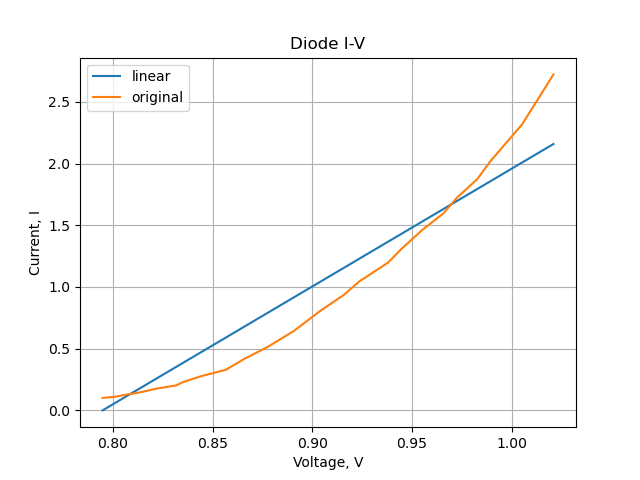

In [3]:
''' Answer as code here '''

import pyomo.environ as pyo
import math
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()
model.name = 'Linear'
model.a = pyo.Var(initialize=0)
model.b = pyo.Var(initialize=0)


def objective(model):
    sum = 0
    for i in range(len(Ifulldata)):
        sum += (Ifulldata[i, 0] - (model.a + model.b * Vfulldata[i, 0])) ** 2
    return sum


def ineqconstr(model, i):
    return model.a + model.b * Vfulldata[i, 0] >= 0


model.obj = pyo.Objective(rule=objective, sense=pyo.minimize)
model.constraint = pyo.Constraint(pyo.RangeSet(0, 24), rule=ineqconstr)

# create an instance of the problem
Linear = model.create_instance()
# this is to access Lagrange multipliers (dual variables)
Linear.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

# define solver
opt = pyo.SolverFactory('ipopt')  # we can use other solvers here as well

results = opt.solve(Linear)

# show resul#
Linear.display()

res = []
for v in Linear.component_data_objects(pyo.Var, active=True):
    res.append(pyo.value(v))

plt.figure()
plt.plot(dataset.values[:, 0], res[0] + res[1] * dataset.values[:, 0], label='linear')
plt.plot(dataset.values[:, 0], dataset.values[:, 1], label='original')
plt.xlabel('Voltage, V')
plt.ylabel('Current, I')
plt.title('Diode I-V')
plt.legend()
plt.grid()
plt.show()


1.1.2

<IPython.core.display.Javascript object>


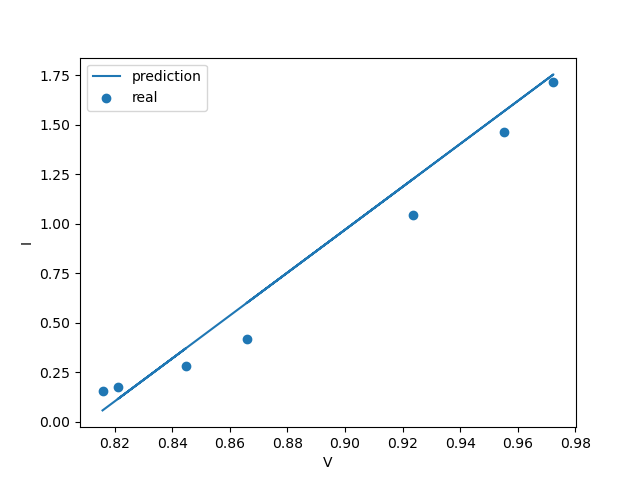

Coefficinets:   [[10.85143854]]
Interception:   [-8.79614778]
MSE:  0.014356539712061722
cross validation scores: 0.04907382934163986


In [72]:
linear = linear_model.LinearRegression()
linear.fit(Vtrain, Itrain)
Ipred = linear.predict(Vtest)

# plot the result
plt.figure()
plt.plot(Vtest, Ipred, label='prediction')
plt.scatter(Vtest, Itest, label='real')
plt.xlabel('V')
plt.ylabel('I')
plt.legend()
plt.show()

# coefficients
print('Coefficinets:  ', linear.coef_)
print('Interception:  ', linear.intercept_)
#MSE
print("MSE: ",  mean_squared_error(Ipred, Itest))
#cross val score
scores = cross_val_score(linear, Vtrain, Itrain,scoring="neg_mean_squared_error", cv=10)
print('cross validation scores:', -scores.mean())


1.1.3

<IPython.core.display.Javascript object>


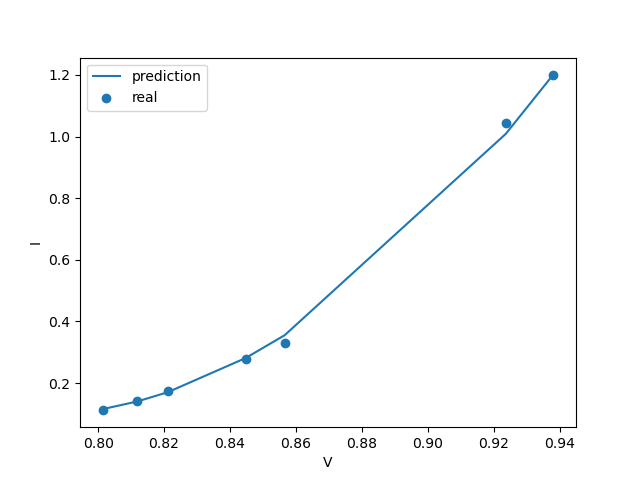

Cofficients:  [[ 26.91379757 -68.79026288  44.11141357]]
MSE:  0.00030206849114571314
cross validation scores: 0.0009542898974010432


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import cross_val_score

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                 ('linear', LinearRegression(fit_intercept=False))])
poly = poly.fit(Vtrain, Itrain)
Ipred = poly.predict(Vtest)

# plot the result
plt.figure()
plt.plot(sorted(Vtest), sorted(Ipred), label='prediction')
plt.scatter(Vtest, Itest, label='real')
plt.xlabel('V')
plt.ylabel('I')
plt.legend()
plt.show()

print("Cofficients: ", poly.named_steps['linear'].coef_)
print("MSE: ", mean_squared_error(Ipred, Itest))
scores = cross_val_score(poly, Vtrain, Itrain,scoring="neg_mean_squared_error", cv=10)
print('cross validation scores:', -scores.mean())

MSE is much smaller than the previous one\
So, we could say that the polynimal model is doing better to predict these series of data. The cross validation scores also show this.\
\
1.1.4

In [69]:
regularisation = linear_model.Ridge(alpha=0.5)
regularisation = regularisation.fit(Vtrain, Itrain)
Ipred = regularisation.predict(Vtest)

print('Coefficinets:  ', regularisation.coef_)
print('Interception:  ',regularisation.intercept_)
print("MSE: ", mean_squared_error(Ipred,Itest))

Coefficinets:   [[1.76694047]]
Interception:   [-0.63338094]
MSE:  0.2827474668527134


MSE here is much bigger than we obtained in 1.1.2, which means the regularisation brings a negative impact on this question. Sometimes the regularisation terms may bring overfit issue.\
\
1.1.5

<IPython.core.display.Javascript object>


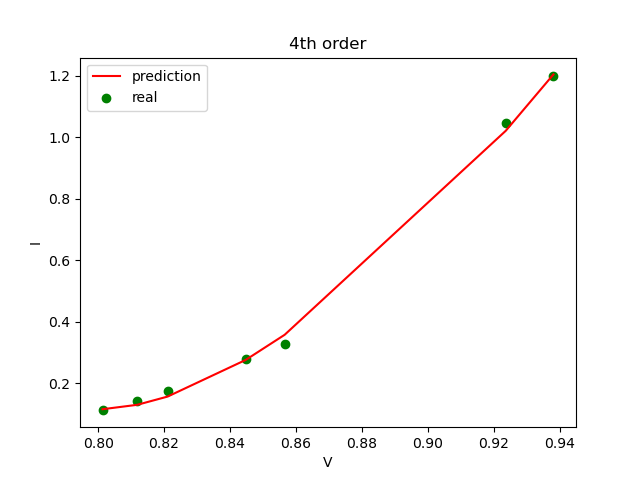

[[  648.56686811 -2850.85492126  4701.10985676 -3455.78864943
    959.19234815]]
MSE: 0.000276947881554814
cross validation scores: 0.0006468072415067329


<IPython.core.display.Javascript object>

[[ -14829.47558407   91514.54371569 -232494.27179517  310594.77786178
  -229459.76816138   88508.78540154  -13832.3822133 ]]
MSE: 0.00015163080787259798
cross validation scores: 0.00021706315898468613


In [5]:
forth = Pipeline([('poly', PolynomialFeatures(degree=4)),
                 ('linear', LinearRegression(fit_intercept=False))])
forth = forth.fit(Vtrain, Itrain)
Ipred = forth.predict(Vtest)

# plot the result

plt.figure()
plt.plot(sorted(Vtest), sorted(Ipred), label='prediction', c='r')
plt.scatter(Vtest, Itest, label='real', c='g')
plt.xlabel('V')
plt.ylabel('I')
plt.legend()
plt.title('4th order')
plt.show()

print(forth.named_steps['linear'].coef_)
print("MSE:", mean_squared_error(Ipred, Itest))
scores = cross_val_score(forth, Vtrain, Itrain,scoring="neg_mean_squared_error", cv=10)
print('cross validation scores:', -scores.mean())

sixth = Pipeline([('poly', PolynomialFeatures(degree=6)),
                 ('linear', LinearRegression(fit_intercept=False))])
sixth = sixth.fit(Vtrain, Itrain)
Ipred = sixth.predict(Vtest)

# plot the result

plt.figure()
plt.plot(sorted(Vtest), sorted(Ipred), label='prediction', c='r')
plt.scatter(Vtest, Itest, label='real', c='g')
plt.xlabel('V')
plt.ylabel('I')
plt.legend()
plt.title('6th order')
plt.show()

print(sixth.named_steps['linear'].coef_)
print("MSE:", mean_squared_error(Ipred, Itest))
scores = cross_val_score(sixth, Vtrain, Itrain,scoring="neg_mean_squared_error", cv=10)
print('cross validation scores:', -scores.mean())

We could find that the cofficients are larger and lareger with the increase of model degrees. Although the 6th order has the smallest MSE of training error, it also earns bigger cross validation scores which imply overfit. So, the best model is the 4th degree one. If we are using 6th order one, we could apply regularisation or other method to fix the overfit problem.

# Section 2: Clustering and Gaussian Mixtures

Unsupervised learning is all about data. We will use first the famous two moon data set to practice a little bit and digest some of the fundemental concepts. Since two moons data inherently has two clusters (each moon as a cluster), we can use this as a [ground truth](https://en.wikipedia.org/wiki/Ground_truth). In most real problems, we don't have this luxury of having the ground truth at hand! 

**Note** that Scikit Learn does not have its own global random state but uses the [numpy random state](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html#numpy.random.seed) instead. See the code below.

### Important Note on Random Number/Vector Generation

**Each group has to use a different number seed (which is an arbitrary number as illustrated above) and groups cannot share seeds. The pseudo-randomness is used here to create diversity. Otherwise, if groups use the same seed, the results will be the same (opening the door to plagiarism) and significant number of points will be taken off! As a practical hint, you can use a modified-combination of your student numbers**

<IPython.core.display.Javascript object>


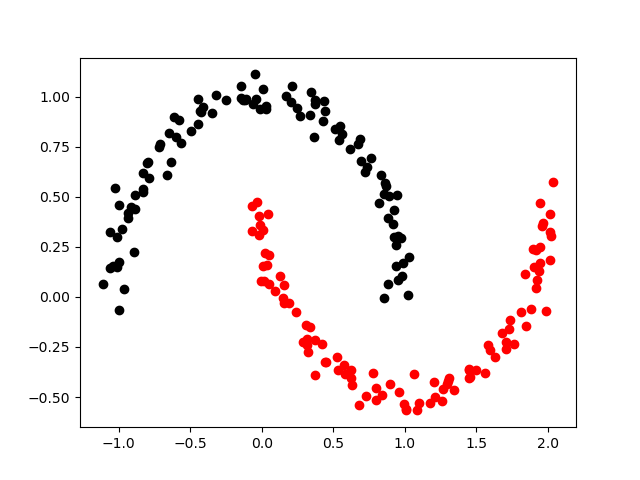

In [6]:
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
#np.random.seed(Put here a group-specific number!)

np.random.seed(1009407)
noisy_moons = datasets.make_moons(n_samples=200, noise=0.05)
X = noisy_moons[0] # data points
y = noisy_moons[1] # 0, 1 labels of class, 50 each - giving us the ground truth

order_ind = np.argsort(y) # order labels, 50 each class
X1 = X[order_ind[0:100]]   # class 1
X2 = X[order_ind[101:200]] # class 2

# Plot data
plt.figure()
plt.scatter(X1[:,0], X1[:,1], color='black')
plt.scatter(X2[:,0], X2[:,1], color='red')
plt.show()

### Question 2.1.  K-means clustering (4 pts)

1. Use sklearn (scikit-learn) k-means clustering algorithm to divide the two moon data given above (X) into two clusters. Plot the result and show the cluster centres that you found.
2. Experiment with different starting points (init='random') and number of clusters, e.g. 3, 4, 5. Write your observations and interpret them using your theoretical knowledge from lectures and books.

Coordinate of Centers:
[[-0.2410522   0.60412009]
 [ 1.16964683 -0.06998831]]


<IPython.core.display.Javascript object>


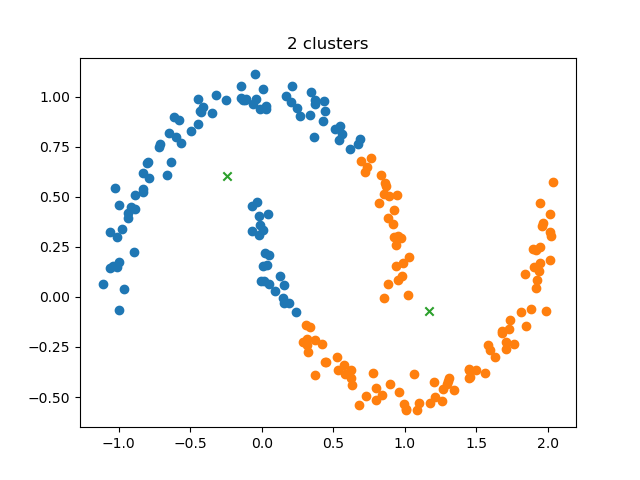

Coordinate of Centers:
[[ 0.48138346  0.27970773]
 [ 1.53958688 -0.17313786]
 [-0.59407528  0.6622576 ]]


<IPython.core.display.Javascript object>


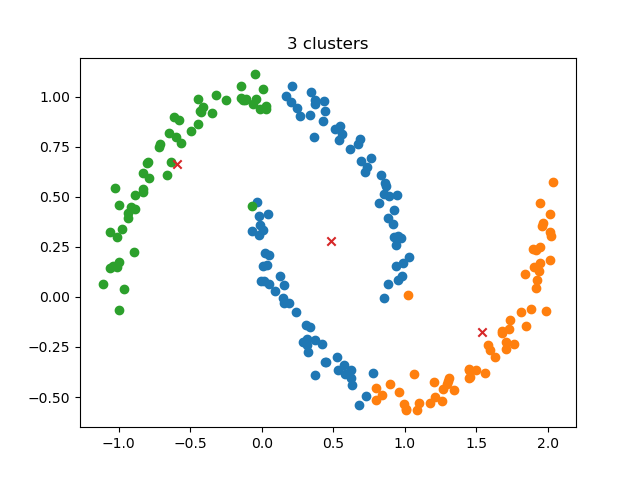

Coordinate of Centers:
[[ 0.80232521 -0.25351296]
 [ 0.2851619   0.64021566]
 [-0.77099749  0.5622018 ]
 [ 1.79357458 -0.01056857]]


<IPython.core.display.Javascript object>


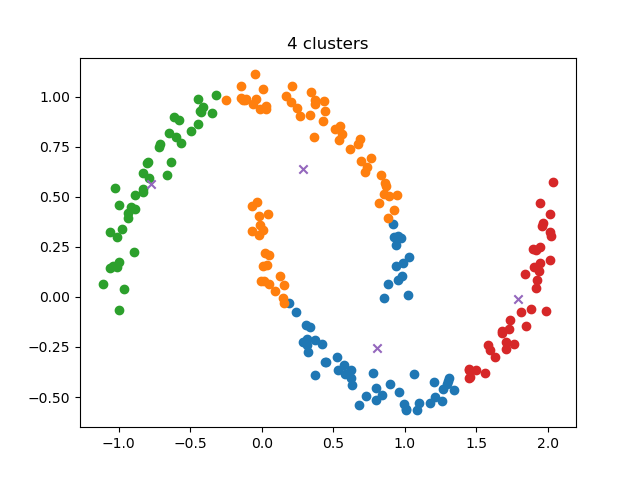

Coordinate of Centers:
[[ 0.40849985  0.82369112]
 [ 1.84571558  0.04723097]
 [-0.75860125  0.57224587]
 [ 0.15341589  0.04172027]
 [ 0.99698742 -0.27649672]]


<IPython.core.display.Javascript object>


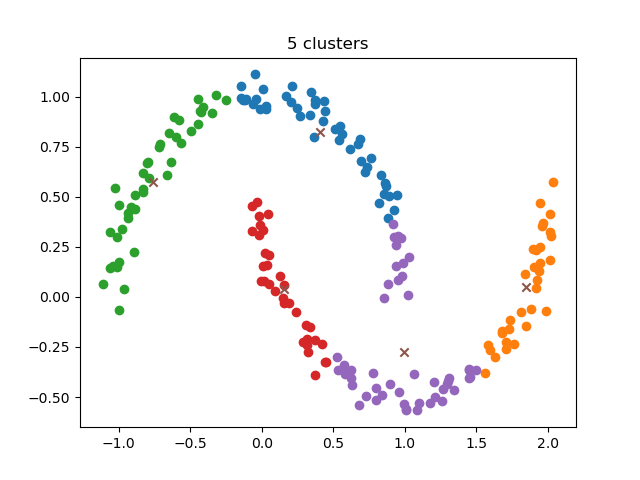

In [10]:
''' Answer as code here '''
def k_means(num, data):
    k = KMeans(init='random', n_clusters=num, random_state=0).fit(data)
    print('Coordinate of Centers:')
    print(k.cluster_centers_)
    plt.figure()
    plt.title('{} clusters'.format(num))
    for i in range(num):
        plt.scatter(data[k.predict(data) == i, 0], data[k.predict(data) == i, 1])

    # plot centers
    plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], marker='x')
    plt.show()


for i in [2, 3, 4, 5]:
    k_means(i, X)

**Answer as text here**\
The kmean methods cannot separate the moon data approperiately,because the data is not linear separable.\
\
The decision rule is that:\
1.The “cluster center” is the arithmetic mean of all the points belonging to the cluster.\
2.Each point is closer to its own cluster center than to other cluster centers, the boundaries between k-means clusters will always be linear.

### Question 2.2.  GMM as density estimator (6 pts)

1. Now use a Gaussian mixture model (GMM) for clustering the same two moon data. Try two clusters and plot your results. GMMs also provides you probabilities (of a sample belonging to a cluster). Print those of a few samples.
2. Increase the number of components of your GMM model. What do you observe? Use a metric to choose the number of components in a principled way. *Hint: check [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) or [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) *
3. It is maybe better to use GMM as a **generative model**! Generate 200 brand new samples from a well functioning gmm model with your choice of parameters and plot your results. Discuss your findings!


2.2.1 & 2.2.2

<IPython.core.display.Javascript object>


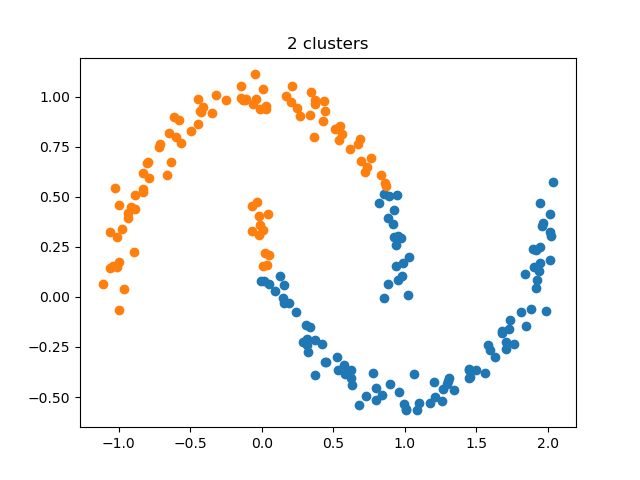

for the 2 clusters,AIC: 708.6727149987116
for the 2 clusters,BIC: 744.95420603074
Probabilities for the 10th samples:
[-1.64322824]
Probabilities for the 20th samples:
[-2.40322022]
Probabilities for the 30th samples:
[-1.82905083]
Probabilities for the 40th samples:
[-1.9369823]
Probabilities for the 50th samples:
[-1.61048874]


<IPython.core.display.Javascript object>


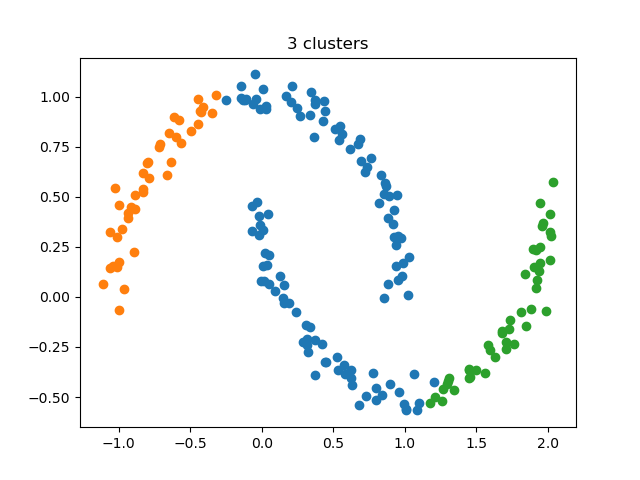

for the 3 clusters,AIC: 566.9646693795837
for the 3 clusters,BIC: 623.0360646109003


<IPython.core.display.Javascript object>


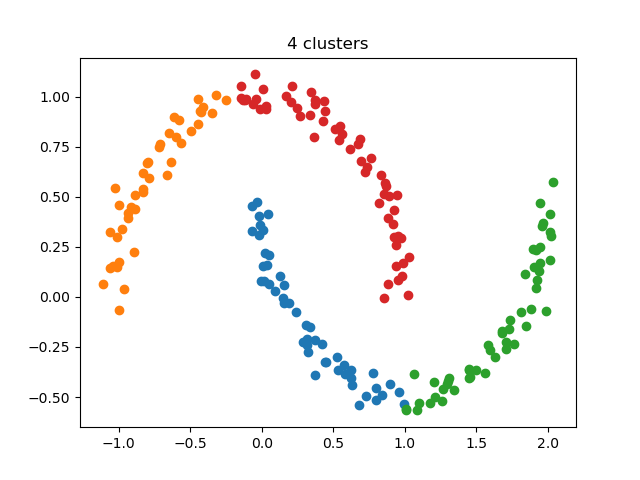

for the 4 clusters,AIC: 465.46814107160486
for the 4 clusters,BIC: 541.3294405022096


<IPython.core.display.Javascript object>


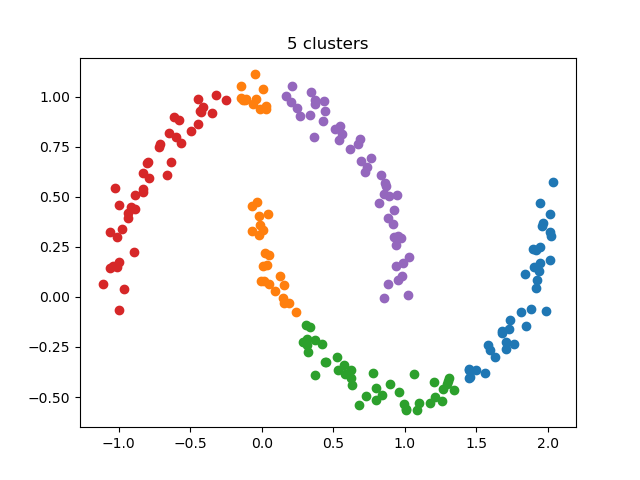

for the 5 clusters,AIC: 406.55819636867284
for the 5 clusters,BIC: 502.2093999985659


<IPython.core.display.Javascript object>


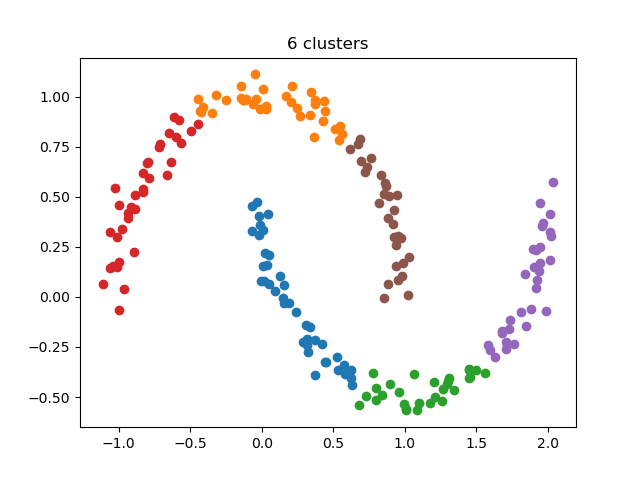

for the 6 clusters,AIC: 314.4214894870522
for the 6 clusters,BIC: 429.8625973162335


<IPython.core.display.Javascript object>


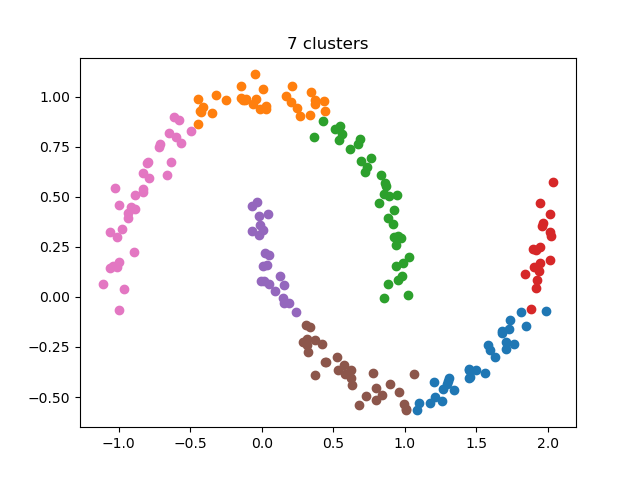

for the 7 clusters,AIC: 271.0637007428574
for the 7 clusters,BIC: 406.2947127713269


<IPython.core.display.Javascript object>


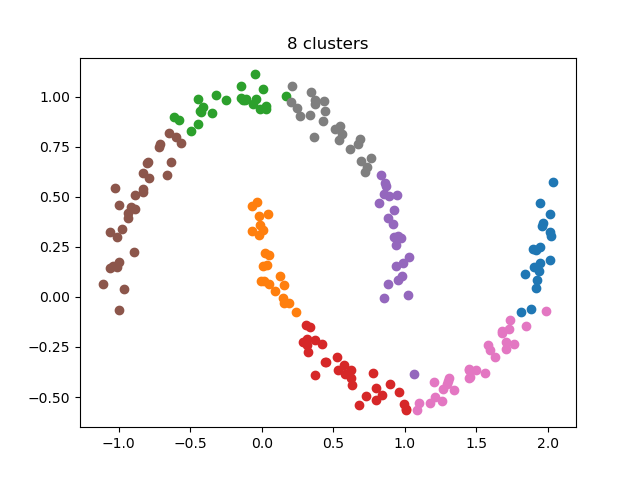

for the 8 clusters,AIC: 233.79997492667988
for the 8 clusters,BIC: 388.8208911544376


<IPython.core.display.Javascript object>


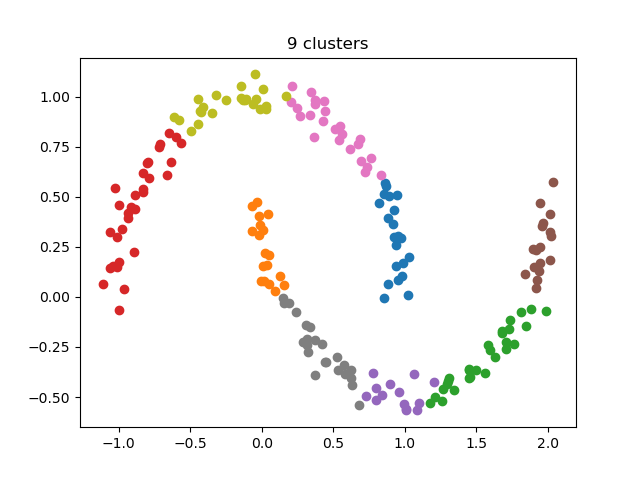

for the 9 clusters,AIC: 230.6302423676005
for the 9 clusters,BIC: 405.4410627946464


<IPython.core.display.Javascript object>


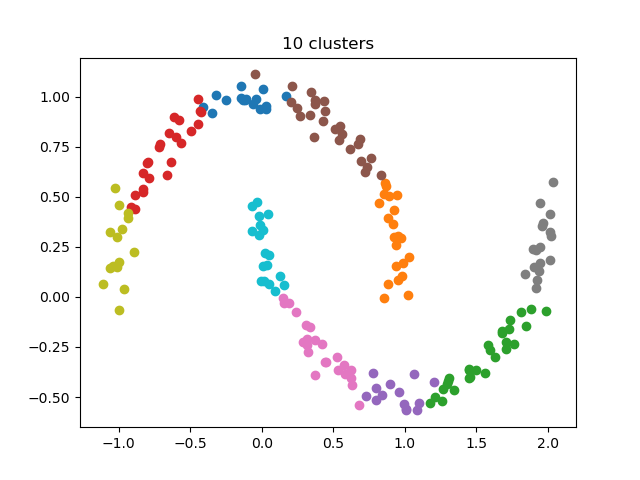

for the 10 clusters,AIC: 219.41596306965823
for the 10 clusters,BIC: 414.0166876959924


<IPython.core.display.Javascript object>


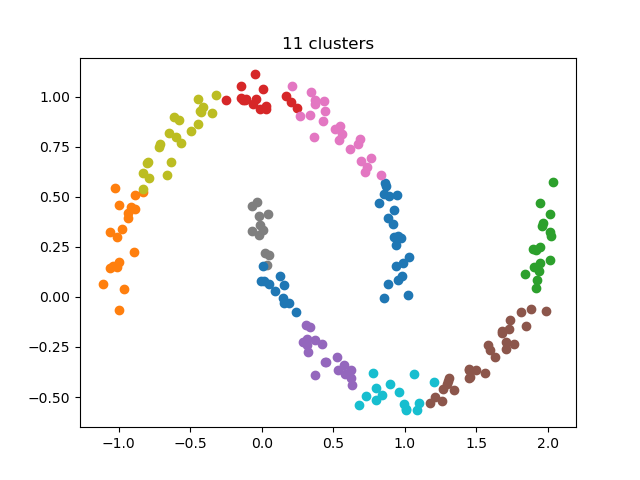

for the 11 clusters,AIC: 220.37596798637708
for the 11 clusters,BIC: 434.7665968119994


<IPython.core.display.Javascript object>


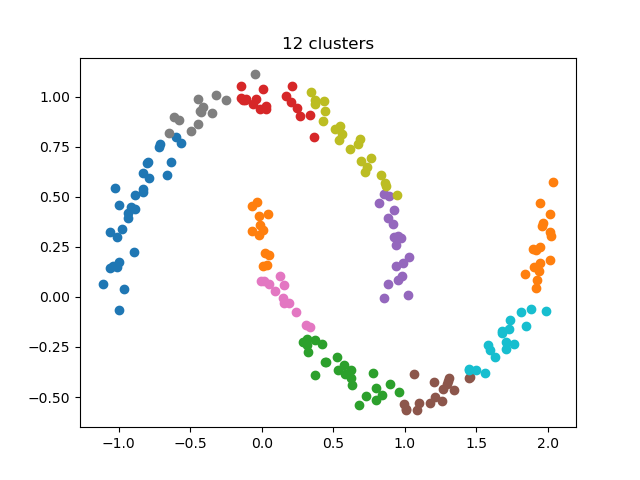

for the 12 clusters,AIC: 221.9231329392092
for the 12 clusters,BIC: 456.1036659641198


<IPython.core.display.Javascript object>


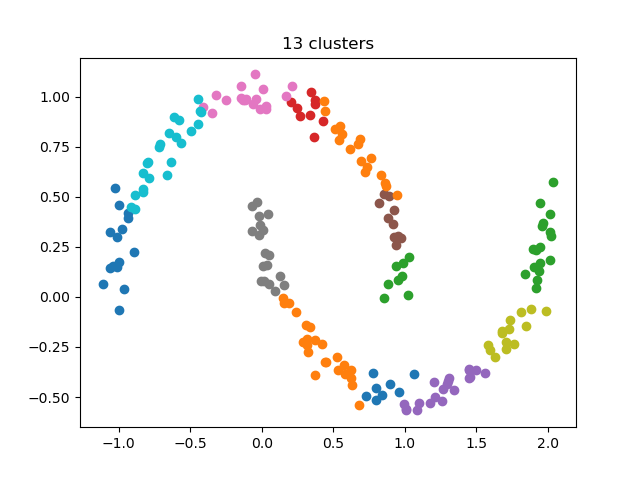

for the 13 clusters,AIC: 217.53265317334473
for the 13 clusters,BIC: 471.50309039754353


<IPython.core.display.Javascript object>


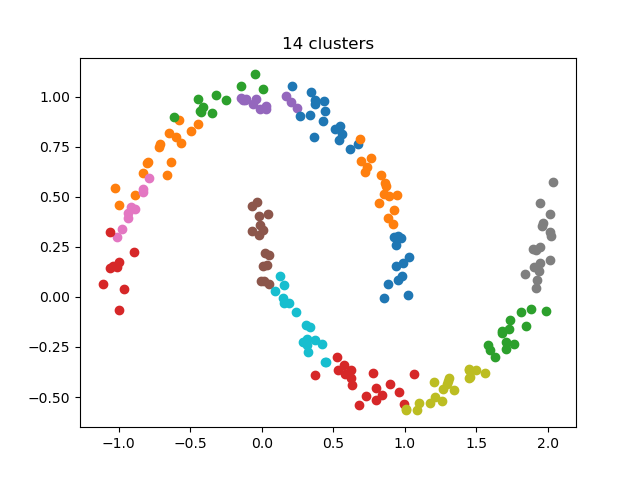

for the 14 clusters,AIC: 216.59803695000008
for the 14 clusters,BIC: 490.3583783734871


<IPython.core.display.Javascript object>


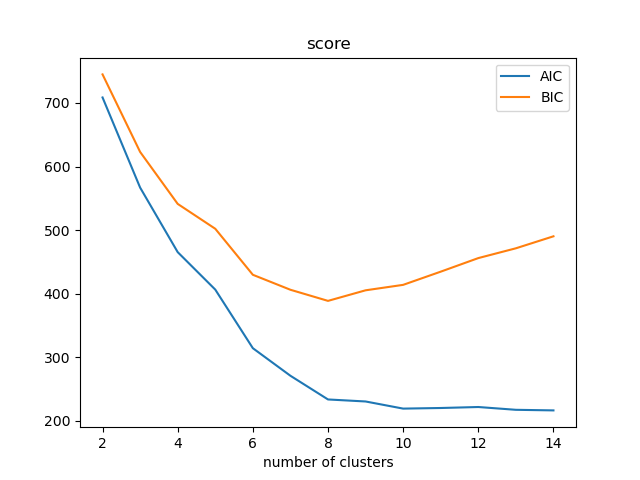

In [16]:
''' Answer as code here '''
def gmm_method(num, data, print_samples=0):
    gmm = mixture.GaussianMixture(n_components=num, covariance_type='full').fit(data)
    plt.figure()
    plt.title('{} clusters'.format(num))
    for i in range(num):
        plt.scatter(X[gmm.predict(data) == i, 0], X[gmm.predict(data) == i, 1])
    plt.show()
    print('for the {} clusters,AIC:'.format(num), gmm.aic(data))
    print('for the {} clusters,BIC:'.format(num), gmm.bic(data))

    if print_samples:
        for i in [10, 20, 30, 40, 50]:
            print('Probabilities for the {}th samples:'.format(i))
            print(gmm.score_samples(X[i - 1].reshape(1, 2)))

    return gmm.aic(data),gmm.bic(data)


num_of_tests = 13
aic_score = np.zeros(num_of_tests)
bic_score = np.zeros(num_of_tests)
aic_score[0],bic_score[0] = gmm_method(2, X, 1)
i = 1
while i < num_of_tests:
    aic_score[i],bic_score[i] = gmm_method(i + 2, X)
    i += 1

plt.figure()
plt.title('score')
plt.xlabel('number of clusters')
plt.plot(range(2, num_of_tests + 2), aic_score, label='AIC')
plt.plot(range(2, num_of_tests + 2), bic_score, label='BIC')
plt.legend()
plt.show()

**Answer as text here**\
From the figures, we could find that AIC chooses the largest cluster, and BIC score prefers 8 clusters model.\
Because, BIC has a larger penalty on the complexity of the model than AIC.\
\
To balance the complexity and the accuarcy, I think 8 clusters model is the best one for this question.

2.2.3

<IPython.core.display.Javascript object>


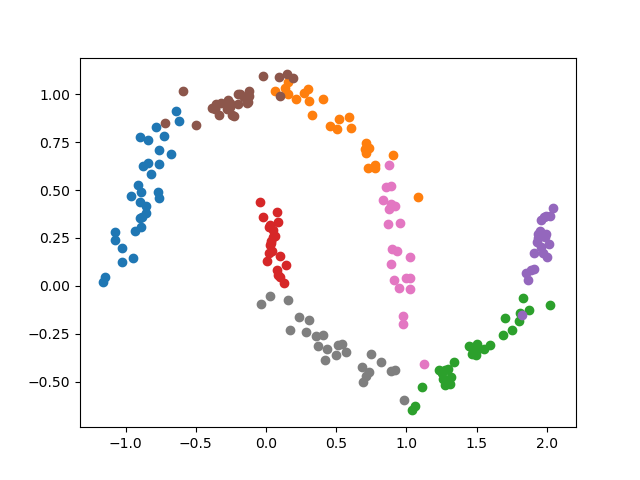

In [20]:
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full').fit(X)
[samples,labels] = gmm.sample(200) 
plt.figure()
for i in range(8):
    plt.scatter(samples[labels==i,0], samples[labels==i,1])
plt.show()

We could find a similar shape with the moon.\
It means that the 8 cluseters model could be a generative model to generate random sample points having the same distribution and clusters as the original set.

# Section 3: PCA and Simple Classification

It is time to move beyond the toy data set. The next data set is still small and clean but is more interesting!

## 3.1 _Example_. Wireless Indoor Localization

The next data set shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

This [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) was used in the following publications:
> * Jayant G Rohra, Boominathan Perumal, Swathi Jamjala Narayanan, Priya Thakur, and Rajen B Bhatt, 'User Localization in an Indoor Environment Using Fuzzy Hybrid of Particle Swarm Optimization & Gravitational Search Algorithm with Neural Networks', in Proceedings of Sixth International Conference on Soft Computing for Problem Solving,2017, pp. 286-295.
> * Rajen Bhatt, 'Fuzzy-Rough Approaches for Pattern Classification: Hybrid measures, Mathematical analysis, Feature selection algorithms, Decision tree algorithms, Neural learning, and Applications', Amazon Books 


In [8]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

s1  s2  s3  s4  s5  s6  s7  Room Number
1995 -59 -59 -48 -66 -50 -86 -94            4
1996 -59 -56 -50 -62 -47 -87 -90            4
1997 -62 -59 -46 -65 -45 -87 -88            4
1998 -62 -58 -52 -61 -41 -90 -85            4
1999 -59 -50 -45 -60 -45 -88 -87            4

In [9]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [10]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

### Question 3.1.  Clustering-based classification (6 pts)

1.  (2 pts) Use Kmeans clustering on training data to find the 4 cluster corresponding to the rooms. Then, test their quality using a [mutual information based score.](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores) 
2.  (2 pts) Conduct a [PCA analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the data with 2, 3, 4 features: find singular values, variance ratios, and plot in 2D or 3D (for 2 or 3 features). What is the number of features that balances information and complexity? Is there redundancy in data? Discuss.
3. (1 pt) Now, repeat Kmeans clustering with the PCA-transformed data. Do you see an improvement in scores? Why or why not? Discuss, based on your knowledge of PCA and Kmeans clustering. 
4. (1 pt) What information does Kmeans ignore when used for classification? Is what we do a good classification method? What can you say about the complexity of the problem given?

3.1.1

In [11]:
''' Answer as code here '''
def kmeans_pred(num, data, test):
    kmeans = KMeans(init='random', n_clusters=num, random_state=0).fit(data)
    
    SRIpred_train = kmeans.predict(data)
    SRIpred_test = kmeans.predict(test)
    
    print('mutual information based score:')
    print('train:',metrics.adjusted_mutual_info_score(SRIpred_train, loctrain))
    print('test:',metrics.adjusted_mutual_info_score(SRIpred_test, loctest))


kmeans_pred(4, SRItrain, SRItest)

mutual information based score:
train: 0.8883348164272745
test: 0.8885451658244548


3.1.2

<IPython.core.display.Javascript object>


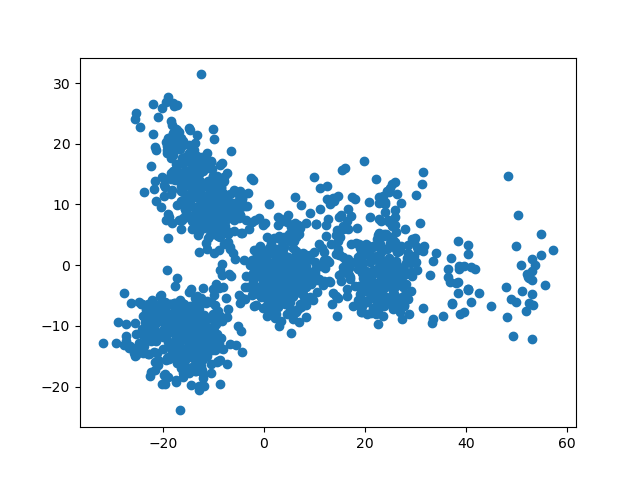

component= 2
Singular values [675.38095976 371.73569425]
Variance ratio [0.6551296  0.19847149]


<IPython.core.display.Javascript object>

component= 3
Singular values [675.38095976 371.73569425 185.78983197]
Variance ratio [0.6551296  0.19847149 0.04957623]
component= 4
Singular values [675.38095976 371.73569425 185.78983197 148.54917421]
Variance ratio [0.6551296  0.19847149 0.04957623 0.03169349]


In [12]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca2 = PCA(2)
SRItrain_2 = pca2.fit_transform(SRItrain)
plt.figure()
plt.scatter(SRItrain_2[:, 0], SRItrain_2[:, 1])
plt.show()
print('component= 2')
print('Singular values', pca2.singular_values_)
print('Variance ratio', pca2.explained_variance_ratio_)

pca3 = PCA(3)
SRItrain_3 = pca3.fit_transform(SRItrain)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(SRItrain_3[:, 0], SRItrain_3[:, 1], SRItrain_3[:, 2])
plt.show()
print('component= 3')
print('Singular values', pca3.singular_values_)
print('Variance ratio', pca3.explained_variance_ratio_)

pca4 = PCA(4)
SRItrain_4 = pca4.fit_transform(SRItrain)
print('component= 4')
print('Singular values', pca4.singular_values_)
print('Variance ratio', pca4.explained_variance_ratio_)


We could find that the Variance becomes very small after the first two components( 0.049 and 0.03 for 3&4). So we could reduce the dimensionality from 7 to 3 without lossing to much information and avoid complexity. In addition, the original dataset has redundancy.\
\
3.1.3

In [63]:
SRItest_2 = pca2.fit_transform(SRItest)
print('component = 2')
kmeans_pred(4, SRItrain_2, SRItest_2)
print()

SRItest_3 = pca3.fit_transform(SRItest)
print('component = 3')
kmeans_pred(4, SRItrain_3, SRItest_3)
print()

SRItest_4 = pca4.fit_transform(SRItest)
print('component = 4')
kmeans_pred(4, SRItrain_4, SRItest_4)

component = 2
mutual information based score:
train: 0.8774769651861928
test: 0.8949240665973279

component = 3
mutual information based score:
train: 0.8923949801338564
test: 0.9099732455423563

component = 4
mutual information based score:
train: 0.8824466782305869
test: 0.8980313303196213


We could find that when PCA featrue is 3, the clustering get the highest score 0.9099, which is slightly higher than the original clustering 0.9014.\
The improvement may because of the reduce of information.\
\
3.1.4\
kmeans ignores the size of each cluster. Cnsider the set of clusters of sizes 20, 200, 2000. Even if they are sperating far enough, k-means never divides them into correct clusters.\
kmeans also ignores the overlap parts without clear boundires.\
These may be sovled by SVMs.\
This given problem is quite comlicated for kmeans.

# Section 4: Support Vector Machines (SVMs)

We have covered the theory of [SVMs](https://en.wikipedia.org/wiki/Support-vector_machine) during the lectures. It is now time to see SVMs in action! It is appropriate to start with a noisy moon data set. We will use [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) library.

<IPython.core.display.Javascript object>


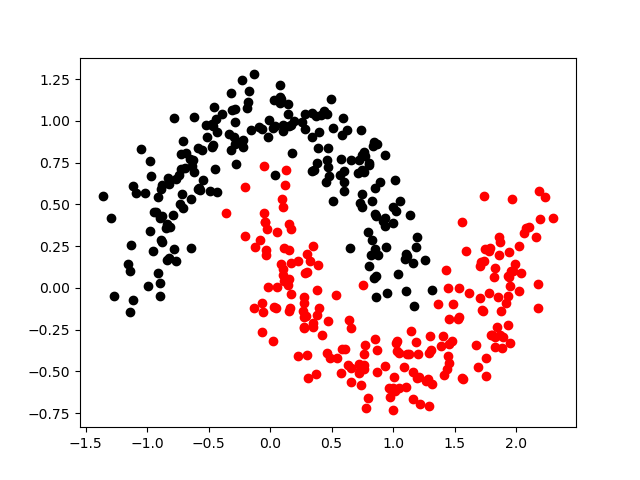

In [13]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics

# helper function to visualise decision boundary, uses the svm model as input
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1
                                 ], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# this is not necessary if you run it in the cell earlier...
#np.random.seed(Put the same or different group specific number!)

# Create a new moons data set
np.random.seed(1009407)
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

### Question 4.1.  Binary SVM Classifiers (6 pts)

First divide the data $(Xm,ym)$ to training and test sets using the default ratio. The range of data values is OK so you can skip data normalisation for this one.

1. Try an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with a linear kernel and different C parameters. Plot the test output and boundary. Discuss your observations and comment on linear separability of this data. Provide the precision, recall, and F-score metrics. *Hint: see [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), especially [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)*
2. Next, use an [RBF kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) and repeat the first part for different C and gamma parameters. Do you observe an improvement compared to linear version (both visually and in terms of scores)? Discuss your results.
3. Perform a cross-validated grid-search over a parameter grid to find good C and gamma hyper-parameters. Plot the AUC ('mean_train_AUC') vs gamma for the best C. *Hint: check [GridSearchCV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py) and [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). Note that you should use semi-log plot!*

<IPython.core.display.Javascript object>


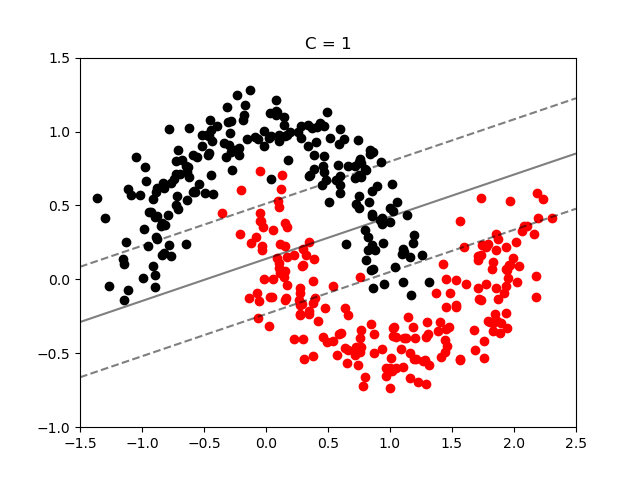

              precision    recall  f1-score   support

       black       0.87      0.80      0.84        51
         red       0.81      0.88      0.84        49

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



<IPython.core.display.Javascript object>


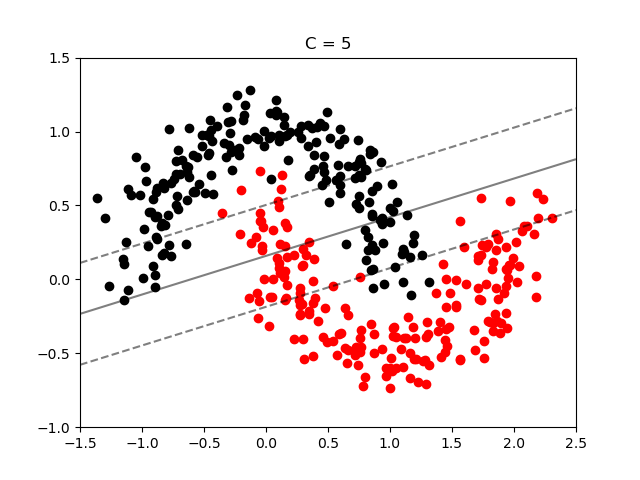

              precision    recall  f1-score   support

       black       0.89      0.80      0.85        51
         red       0.81      0.90      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



<IPython.core.display.Javascript object>


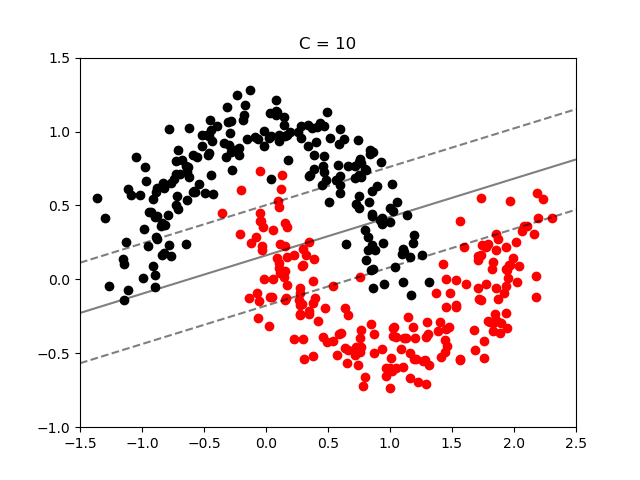

              precision    recall  f1-score   support

       black       0.89      0.80      0.85        51
         red       0.81      0.90      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [14]:
''' Answer as code here '''
from sklearn.metrics import classification_report
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(Xm, ym)


def svm_linear(C):
    SVM_linear = SVC(gamma='auto', C=C, kernel='linear').fit(X_train, y_train)
    y_pred = SVM_linear.predict(X_test)
    
    xlim = [-1.5, 2.5]
    ylim = [-1, 1.5]
    plt.figure()
    ax = plt.gca()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plot_svc_decision_function(SVM_linear, ax)
    plt.scatter(Xm1[:, 0], Xm1[:, 1], color='black')
    plt.scatter(Xm2[:, 0], Xm2[:, 1], color='red')
    plt.title('C = {}'.format(C))
    plt.show()

    print(classification_report(y_test, y_pred,target_names=['black','red']))


for c in [1, 5, 10]:
    svm_linear(c)


**Answer as text here**\
The linear SVM could not divide this set appropriately, no matter in vision or in terms of scores.

4.1.2

<IPython.core.display.Javascript object>


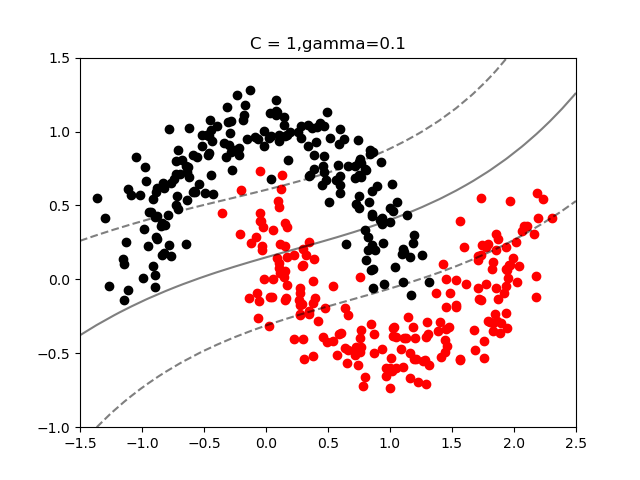

              precision    recall  f1-score   support

       black       0.85      0.88      0.87        52
         red       0.87      0.83      0.85        48

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



<IPython.core.display.Javascript object>


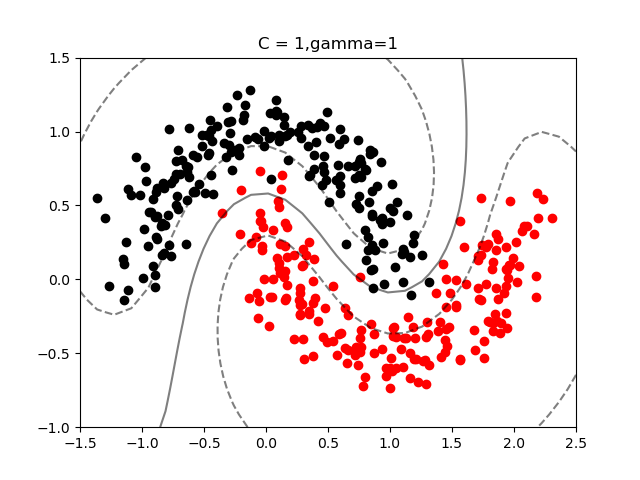

              precision    recall  f1-score   support

       black       0.96      0.98      0.97        52
         red       0.98      0.96      0.97        48

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



<IPython.core.display.Javascript object>


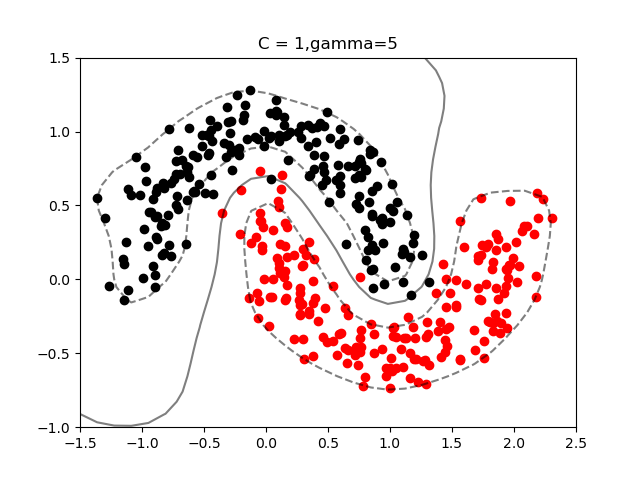

              precision    recall  f1-score   support

       black       0.96      0.98      0.97        52
         red       0.98      0.96      0.97        48

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



<IPython.core.display.Javascript object>


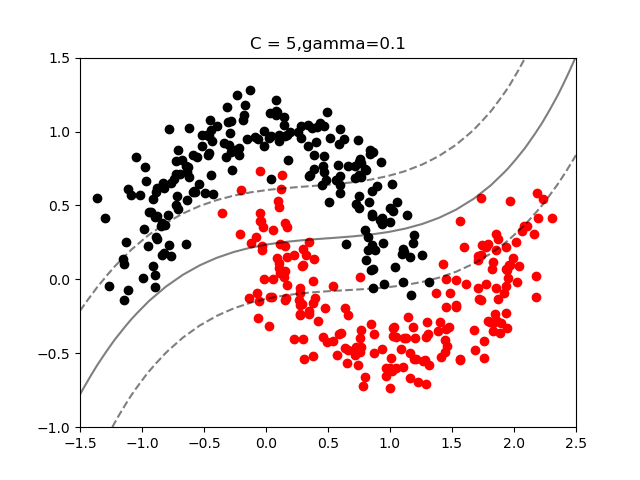

              precision    recall  f1-score   support

       black       0.89      0.90      0.90        52
         red       0.89      0.88      0.88        48

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



<IPython.core.display.Javascript object>


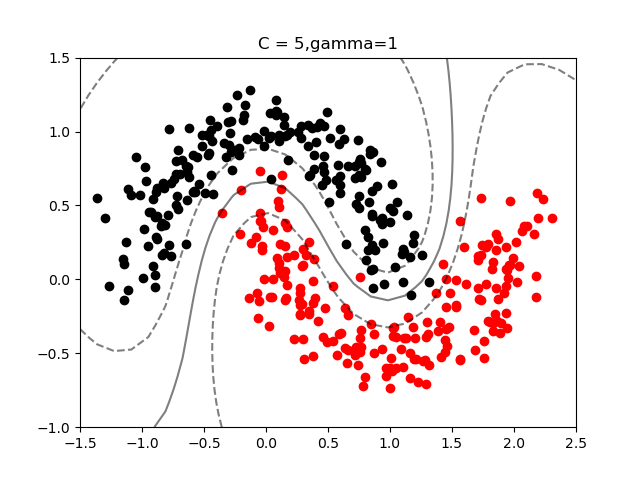

              precision    recall  f1-score   support

       black       0.98      0.98      0.98        52
         red       0.98      0.98      0.98        48

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<IPython.core.display.Javascript object>


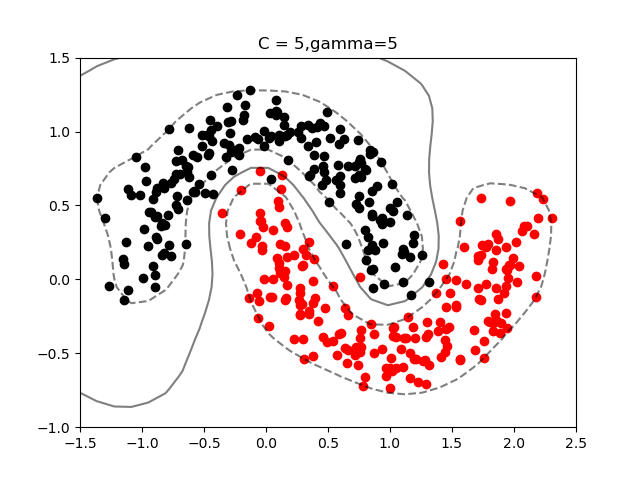

              precision    recall  f1-score   support

       black       1.00      0.98      0.99        52
         red       0.98      1.00      0.99        48

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



<IPython.core.display.Javascript object>


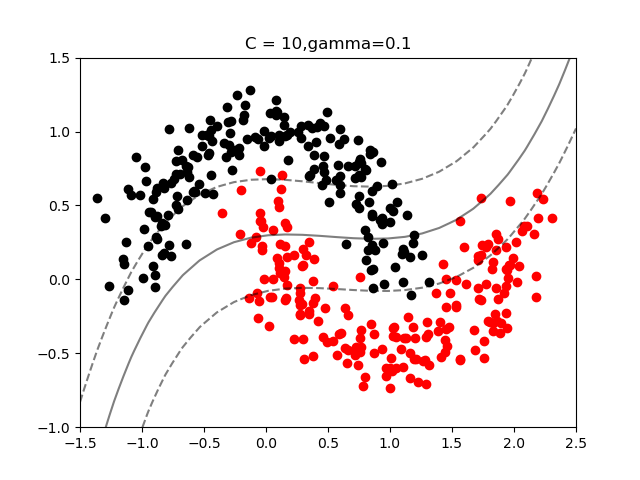

              precision    recall  f1-score   support

       black       0.89      0.92      0.91        52
         red       0.91      0.88      0.89        48

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



<IPython.core.display.Javascript object>


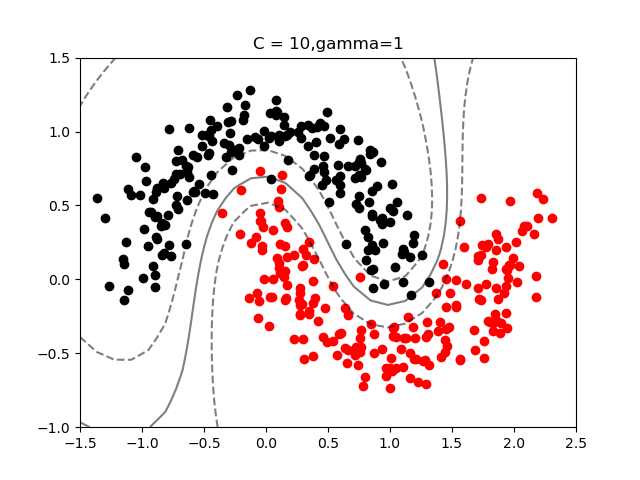

              precision    recall  f1-score   support

       black       0.98      0.98      0.98        52
         red       0.98      0.98      0.98        48

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<IPython.core.display.Javascript object>


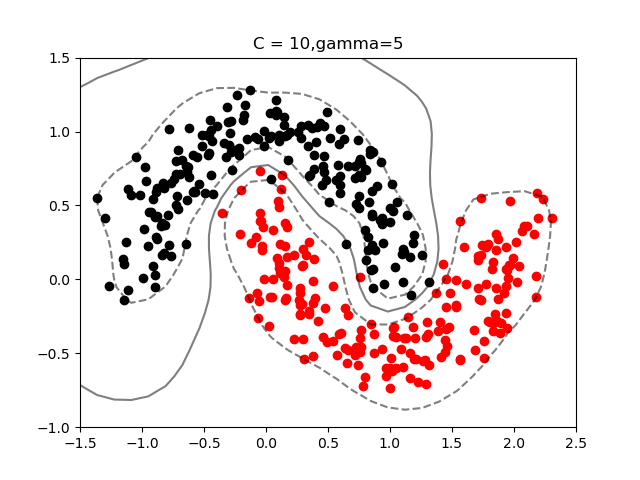

              precision    recall  f1-score   support

       black       1.00      0.98      0.99        52
         red       0.98      1.00      0.99        48

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [83]:
def svm_rbf(C,gamma):
    SVM_rbf = SVC(gamma=gamma, C=C, kernel='rbf').fit(X_train, y_train)
    y_pred = SVM_rbf.predict(X_test)
    
    xlim = [-1.5, 2.5]
    ylim = [-1, 1.5]
    plt.figure()
    ax = plt.gca()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plot_svc_decision_function(SVM_rbf, ax)
    plt.scatter(Xm1[:, 0], Xm1[:, 1], color='black')
    plt.scatter(Xm2[:, 0], Xm2[:, 1], color='red')
    plt.title('C = {},gamma={}'.format(C,gamma))
    plt.show()

    print(classification_report(y_test, y_pred,target_names=['black','red']))

for c in [1, 5, 10]:
    for gamma in [0.1,1,5]:
        svm_rbf(c,gamma)

With the RBF kernel, the result improves a lot. Some of the model reaches 99% accuracy. It shows the rbf kernel is more suitble on nonlinear boundary clustering. \
C is the regularization parameter. The strength of the regularization is inversely proportional to C. And gamma can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.\
\
4.1.3

<IPython.core.display.Javascript object>


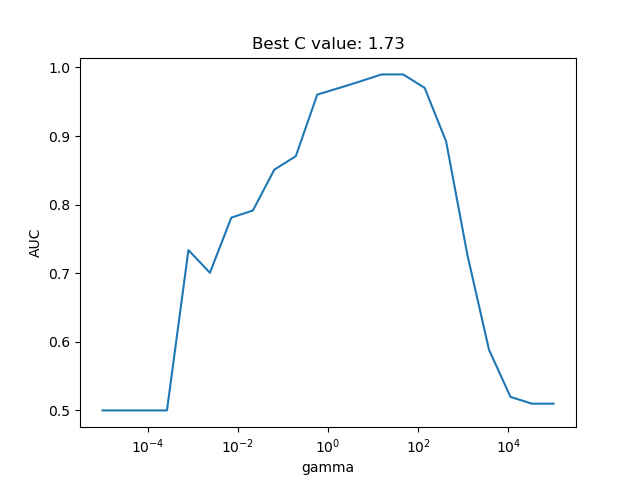

In [7]:
SVM_gs = SVC(kernel="rbf")
C_array = np.logspace(-5, 5, 22)
gamma_array = C_array

param_grid = [{'C': C_array, 'gamma': gamma_array}]
grid_search = GridSearchCV(estimator=SVM_gs, param_grid=param_grid, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_param = grid_search.best_estimator_.get_params()
C_best = best_param['C']

auc = np.zeros(len(gamma_array))
i = 0
for gamma in gamma_array:
    SVM_gs = SVC(gamma=gamma, C=C_best, kernel='rbf').fit(X_train, y_train)
    y_pred = SVM_gs.predict(X_test)
    auc[i] = metrics.roc_auc_score(y_test, y_pred)
    i += 1
plt.figure()
plt.semilogx(gamma_array, auc)
plt.xlabel('gamma')
plt.ylabel('AUC')
plt.title('Best C value: %0.2f' % C_best)
plt.show()

# Section 5: Logistic Regression

Logistic regression uses a linear statistical model. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. It is also used for classification. Let's start with a very simple example to **visualise the logistic function**.

<IPython.core.display.Javascript object>


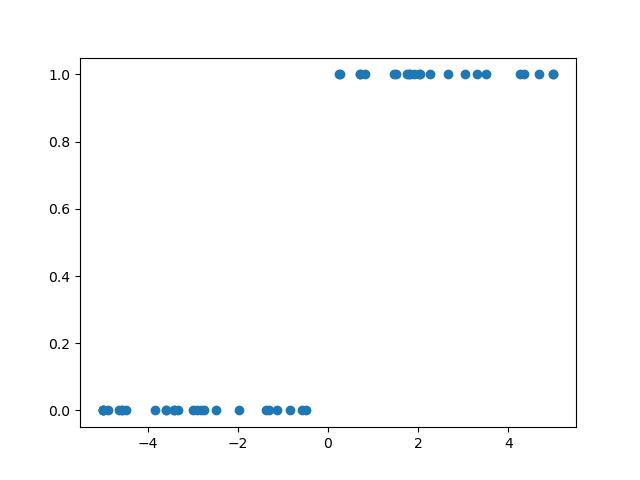

In [15]:
# Generate a toy dataset

toy_samples = 50
X_toy = np.linspace(-5, 5, toy_samples)
Xtoy_test = np.linspace(-5, 5, 200)
# gaussian noise added
X_toy = X_toy + 2*np.random.normal(size=toy_samples)
# upper, lower bound
X_toy = np.clip(X_toy,-5, 5).reshape(-1,1)
# create labels
y_toy = ((np.sign(X_toy)+1)/2.0).ravel()

# visualise
plt.figure()
plt.scatter(X_toy, y_toy)
plt.show()

### Question 5.1.  Simple Logistic Regression (LR) (2 pts)

1. (1 pt) Fit a logistic and linear regression model to the data *(X_toy, y_toy)*. Find the logistic and linear model coefficients and bias *(trained_model.coef_, trained_model.intercept_)*. Hint: check [Sklearn logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
2. (1 pts) Test your models on a simple test set {Xtoy_test} given above. Plot your results and discuss.

**Answer as text here**\
5.1.1

In [16]:
''' Answer as code here '''
from sklearn.linear_model import LogisticRegression

Linear_R = LinearRegression().fit(X_toy, y_toy)
Logistic_R = LogisticRegression(random_state=0).fit(X_toy, y_toy)

print('Linear Regression model:')
print('coefficient', Linear_R.coef_)
print('intercept', Linear_R.intercept_)
print('Logistic Regression model:')
print('coefficient', Logistic_R.coef_)
print('intercept', Logistic_R.intercept_)


Linear Regression model:
coefficient [0.1404577]
intercept 0.5466173193374421
Logistic Regression model:
coefficient [[1.94773736]]
intercept [0.32562512]


5.1.2

<IPython.core.display.Javascript object>


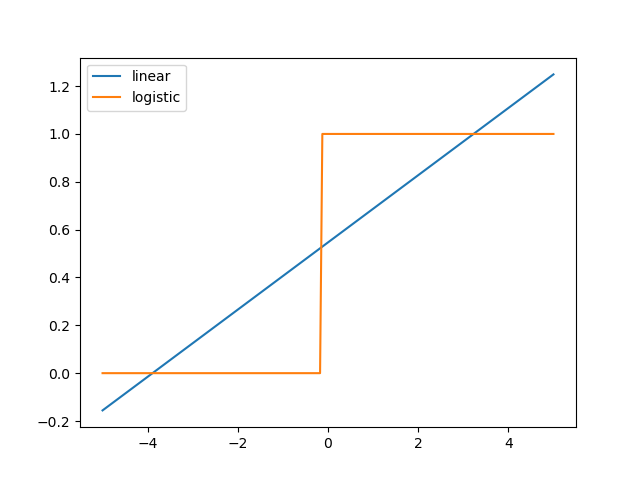

In [17]:
y_test = Linear_R.predict(Xtoy_test.reshape(-1, 1))
plt.figure()
plt.plot(Xtoy_test, y_test,label='linear')
y_test = Logistic_R.predict(Xtoy_test.reshape(-1, 1))
plt.plot(Xtoy_test, y_test,label='logistic')
plt.legend()
plt.show()

We could find the linear could not handle the data like square wave. However, the logistic model could solve the problem appropriately. It is a common S-shaped curve

## 5.2 *Example*. Electrical Grid Stability with Simulated Data

This simulated [dataset](http://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) is related to local stability of a 4-node star system (electricity producer is in the center), which implements a decentralised Smart Grid Control concept. 

>Arzamasov, Vadim, Klemens Boehm, and Patrick Jochem. ['Towards Concise Models of Grid Stability.'](https://dbis.ipd.kit.edu/download/DSGC_simulations.pdf) Communications, Control, and Computing Technologies for Smart Grids (SmartGridComm), 2018 IEEE International Conference on. IEEE, 2018 

*Note that, in many engineering applications such datasets can be generated through simulations (easy) or experimentation (harder). Different from classical ML applications, engineers often have a very good understanding of the underlying physical models, which gives a unique advantage. We will, however, keep it simple in this workshop and use the dataset as is.*

Let's load and process the dataset.

In [18]:
griddata=pd.read_csv('files/Data_for_UCI_named.csv')
griddata.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [19]:
Xgrid = griddata.iloc[:, 0:12] # note that the Column 13 has the answer!
Xgrid.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923

In [20]:
ygrid = griddata.iloc[:, 13]
# 0 if unstable and 1 if stable
ygrid = [ 0 if x=='unstable' else 1 for x in ygrid]

print("prepared data: ",Xgrid[0:5], ygrid[0:5])

prepared data:         tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  
1 -1.255012  0.413441  0.862414  0.562139  0.781760  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  
4 -0.554305  0.797110  0.455450  0.656947  0.820923   [0, 1, 0, 0, 0]


### Question 5.3.  Checking Grid Stability using Logistic Regression (LR)  (6 pts)

Now, we can use the simulated dataset *(Xgrid,ygrid)* to check grid stability. We will use first logistic regression for this purpose. Unfortunately, it is not possible to directly visualise this dataset, so we have to use performance metrics.

1. (1 pt) Preprocess and normalise *Xgrid* using a [*sklearn.preprocessing*](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). You can use, for example, *StandardScaler* or *MinMaxScaler*.
2. (2 pts) Train a logistic regression model that classifies the grid as stable or not, based on input *Xgrid*. Don't forget to divide *Xgrid* into training and test sets. Quantify the performance of LR using standard metrics such as accuracy, precision, recall, and f1 score on the test set. Plot the [ROC curve](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). How do these change w.r.t. [parameter C](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)? Discuss your observations.
3. (2 pts) What are the coefficients of the LR that you trained? What do they tell you about the impact of independent input variables on the dependent output variable *ygrid*? Discuss. *Hint: you can use [regressors package](https://regressors.readthedocs.io/en/latest/index.html) stats function to calculate p-values. See, e.g. [this](http://www.r-tutor.com/elementary-statistics/logistic-regression/significance-test-logistic-regression) or [this](http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients) for info.* 
4. (1 pts) Use a nonlinear SVM, e.g. with rbf kernel, to solve the problem. Quantify the performance of SVM classifier and compare with LR one. Discuss your findings.

**Answer as text here**\
5.3.1

In [21]:
''' Answer as code here '''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Xgrid)
Xgrid_sc = sc.transform(Xgrid)

5.3.2

C: 0.001
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1580
           1       0.85      0.53      0.66       920

    accuracy                           0.79      2500
   macro avg       0.81      0.74      0.75      2500
weighted avg       0.80      0.79      0.78      2500



<IPython.core.display.Javascript object>


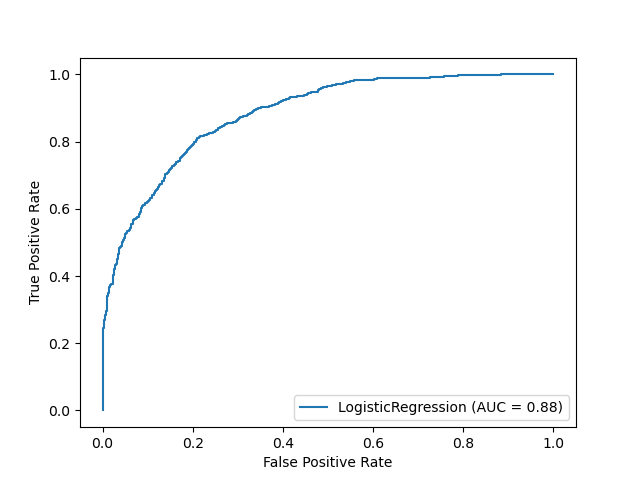

C: 0.01
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1580
           1       0.76      0.66      0.71       920

    accuracy                           0.80      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.79      0.80      0.79      2500



<IPython.core.display.Javascript object>


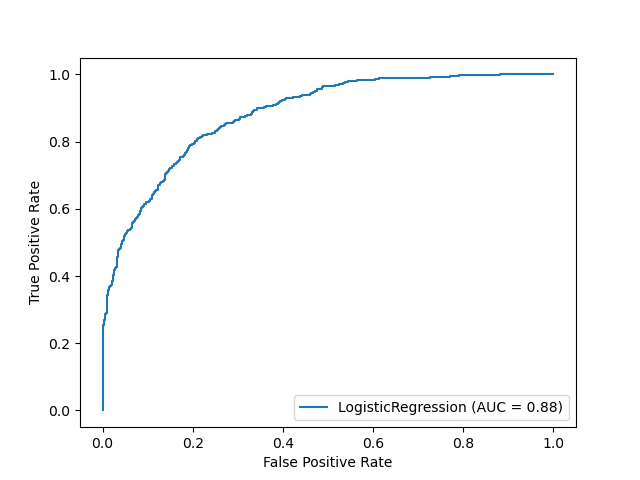

C: 0.1
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1580
           1       0.75      0.68      0.71       920

    accuracy                           0.80      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.80      0.80      0.80      2500



<IPython.core.display.Javascript object>


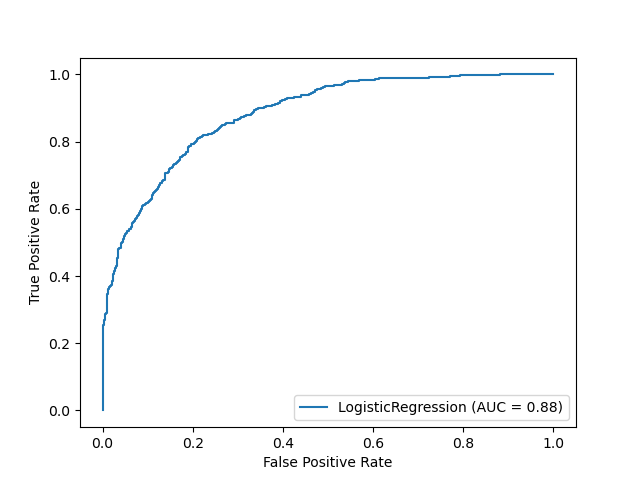

C: 1.0
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1580
           1       0.75      0.68      0.71       920

    accuracy                           0.80      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.80      0.80      0.80      2500



<IPython.core.display.Javascript object>


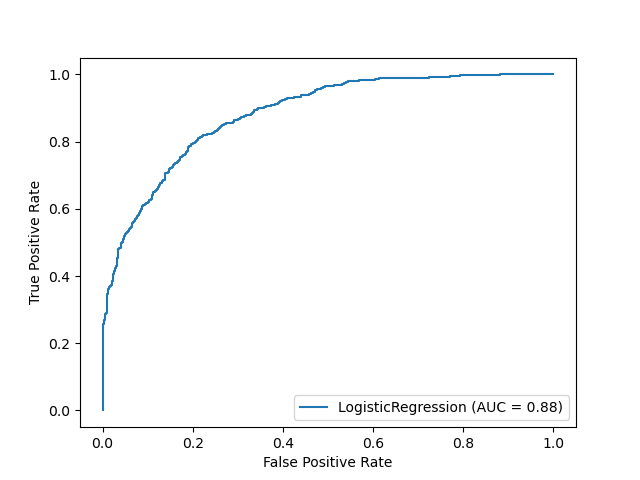

C: 10.0
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1580
           1       0.75      0.68      0.71       920

    accuracy                           0.80      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.80      0.80      0.80      2500



<IPython.core.display.Javascript object>


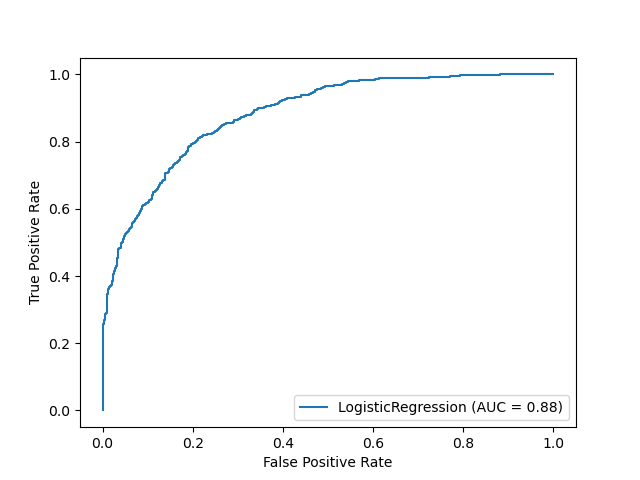

C: 100.0
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1580
           1       0.75      0.68      0.71       920

    accuracy                           0.80      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.80      0.80      0.80      2500



<IPython.core.display.Javascript object>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xgrid_sc, ygrid)


def log_r_with_varying_c(C):
    print('C:', C)
    LogR = LogisticRegression(random_state=0, C=C).fit(X_train, y_train)
    y_pred = LogR.predict(X_test)
    print(classification_report(y_test, y_pred))
    metrics.plot_roc_curve(LogR, X_test, y_test)
    plt.show()


C_array = np.logspace(-3, 2, 6)
for C in C_array:
    log_r_with_varying_c(C)

The C parameter controls the weight of the L2 regularition. A smaller value of C is corresponding to a stronger regularization.
We could find that the score reaches highest after C = 0.1 .\
If the C parameter is too low, the results will be bad, those metrics will be relatively low.\
Compared with low C parameter, the precision metrics are getting lower but other metrics is getting better.\

5.3.3

In [25]:
from regressors import stats

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('coef_\n', lr.coef_)
print('intercept_\n', lr.intercept_)
print('p values\n', stats.coef_pval(lr, X_train, y_train))

coef_
 [[-0.89095029 -0.87381972 -0.90359731 -0.9446115   0.00509926  0.00749156
  -0.03986315  0.02351444 -0.72929952 -0.823199   -0.89367313 -0.77722971]]
intercept_
 [-1.09854249]
p values
 [0.         0.         0.         0.         0.         0.99999999
 0.99999994 0.99999967 0.9999998  0.         0.         0.
 0.        ]


In the output, we can see that the predictor variables of 9 coefficients are significant because both of their p-values are 0.000. However, the p-value for the other 4 cofficients (p around 1) are greater than the common alpha level of 0.05, which indicates that they are not statistically significant.\
We should consider removing these four variables.

5.3.4

In [26]:
SVM_rbf = SVC(kernel='rbf').fit(X_train,y_train)
y_pred = SVM_rbf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1580
           1       0.94      0.92      0.93       920

    accuracy                           0.95      2500
   macro avg       0.95      0.94      0.95      2500
weighted avg       0.95      0.95      0.95      2500



The metrics results is much better than the results using LogisticRegression.
Support Vector Machines is more appropriate than LogisticRegression in this queestion.

## 6 Mini Project: Communications Detective (10 pts)

Your job as a detective is to distinguish malicious people's communications from background civilian communication traffic. As a 21st century detective, you have access to a cognitive radio network and you have ML knowledge!

The [dataset](files/svm_bonus_data.csv) is collected from a simulation where there are multiple malicious people and civilians communicating in a region with multiple passive cognitive radio nodes.
Data about each transmission source is collected from the listener nearest to it. The objective is to classify if a transmission source is an rogue agent or a civilian based on the data.

<img align="left" src="img/detective.png" width="200" hspace="20"/>      <img align="center" src="img/omnet.png" width="400" hspace="20"/>

The data file contains data from 2 classes:
 * civilians - 129 instances (labeled as +1)
 * rogue agents - 129 instances (labeled as -1)

**Features/attributes** are **not** normalised.
1. label 2. carrier_frequency 2. bandwidth 3. bitrate 4. session duration 5. message_length 6. inter-arrival time (iat)

This is an open-ended mini-project. However, for full points, you should consider:
1. Normalise and investigate the data, try e.g. PCA.
2. Try multiple classifiers, e.g. SVM and logistic regression, find their hyper-parameters.
3. Do cross validation, give performance results using metrics, compare/contrast methods.
4. Discuss your findings based on your theoretical/practical knowledge.

In [28]:
commdata=pd.read_csv('files/svm_bonus_data.csv')
commdata.head()

label  carrier_frequency   bandwidth    bitrate  duration  message_length  \
0     -1       3.000000e+09  10000000.0  4000000.0  0.000288      138.924685   
1     -1       3.000000e+09  10000000.0  3000000.0  0.000366      133.339841   
2     -1       2.000000e+09  15000000.0  3000000.0  0.000369      134.657356   
3     -1       3.000000e+09  10000000.0  4000000.0  0.000295      142.475129   
4     -1       2.000000e+09  10000000.0  4000000.0  0.000287      138.554019   

         iat  
0  12.294593  
1  12.343191  
2  12.494220  
3  12.323291  
4  12.472884

In [39]:
# Data process
X = commdata.values[:, 1:]
y = commdata.values[:, 0]
sc = StandardScaler().fit(X)
X_sc = sc.transform(X)
X_pca2 = PCA(n_components=2).fit_transform(X_sc)
X_pca3 = PCA(n_components=3).fit_transform(X_sc)
X_pca4 = PCA(n_components=4).fit_transform(X_sc)
print('Variance ratio for 2 components', pca2.explained_variance_ratio_)
print('Variance ratio for 3 components', pca3.explained_variance_ratio_)
print('Variance ratio for 4 components', pca4.explained_variance_ratio_)



Variance ratio for 2 components [0.6551296  0.19847149]
Variance ratio for 3 components [0.6551296  0.19847149 0.04957623]
Variance ratio for 4 components [0.6551296  0.19847149 0.04957623 0.03169349]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_pca3, y)

#apply logistic regression
LR = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = LR.predict(X_test)

#show performance results and cross validation
print(classification_report(y_test, y_pred))
scores = cross_val_score(LR, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print('cross validation scores:', scores.mean())

#apply SVM rbf
SVM_rbf = SVC(kernel='rbf').fit(X_train, y_train)
y_pred = SVM_rbf.predict(X_test)

#show performance results and cross validation
print(classification_report(y_test, y_pred))
scores = cross_val_score(SVM_rbf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
print('cross validation scores:', scores.mean())

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

cross validation scores: 0.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        36
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

cross validation scores: 0.0


Comment:\
I tried different PCA features, and according to the variance ratio, I chose the 3 components PCA.\
Then I applied logistic regression and rbf SVM. It is easy to find that both metrics equal to 1, which means the prediction in validation data is all correct. That means the training features have high correlation with the classification result. The data given is good enough to get a perfect result easily.\
And the 10 time cross validation scores show zero MSE indicating the models are not overfit.

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks on time and attend respective session to get help from your demonstrator!_ **Submission deadlines will be announced on Canvas.**

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in Canvas by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!